In [116]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [117]:
sys.path.append("../data/clean_housing_data_with_longlat.csv")
clean_housing_data_filepath = '../data/clean_housing_data_with_longlat.csv'

In [118]:
import pandas as pd

def encode_categorical_columns(df, cat_cols):
    '''
    Encode categorical columns in pandas dataframe using one-hot encoding.
    
    Parameters:
    df (pandas dataframe): The dataframe to encode.
    cat_cols (list): A list of column names to encode.
    
    Returns:
    A new pandas dataframe with the specified categorical columns replaced by their encoded values.
    '''
    # check if specified columns exist in the dataframe
    missing_cols = set(cat_cols) - set(df.columns)
    if missing_cols:
        raise KeyError(f"The following columns were not found in the dataframe: {list(missing_cols)}")
    
    # create a new dataframe with the encoded columns
    for col in cat_cols:
        df_encoded = pd.get_dummies(df[col], prefix=col)
        df = df.drop(col, axis=1)
        df = df.join(df_encoded)
    
    return df

In [119]:
categorical_columns = [
    # 'property_type', 
    'community'
]

In [120]:
data = pd.read_csv(clean_housing_data_filepath, on_bad_lines='skip')

data = data.drop(data.columns[0], axis=1)
data = data.drop(['property_type'], axis=1)

# why is the first row 15 non nulls compared to the rest?

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 65
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   address         50 non-null     object 
 2   price           50 non-null     int64  
 3   gross_tax       50 non-null     int64  
 4   bedrooms        50 non-null     int64  
 5   bathrooms       50 non-null     int64  
 6   community       50 non-null     object 
 7   property_views  50 non-null     float64
 8   lot_size        50 non-null     float64
 9   year_built      50 non-null     int64  
 10  lot_width       50 non-null     float64
 11  lot_length      50 non-null     float64
 12  age             50 non-null     int64  
 13  bungalow        50 non-null     int64  
 14  storey          50 non-null     int64  
 15  basement        50 non-null     int64  
 16  laneway_house   50 non-null     int64  
 17  garage          50 non-null     int64

In [121]:

data.head()

,Unnamed: 0,address,price,gross_tax,bedrooms,bathrooms,community,property_views,lot_size,year_built,...,lot_length,age,bungalow,storey,basement,laneway_house,garage,split_entry,latitude,longitude
0,1,3735 Puget Drive,5498800,19041,3,4,arbutus,2410.0,6954.0,1987,...,57.0,36,0,2,1,0,-1,0,49.253353,-123.174578
1,2,3229 Trutch Street,6800000,23411,9,10,arbutus,547.0,8500.0,2020,...,45.0,3,0,2,1,0,0,0,49.257141,-123.176499
2,3,2127 W 21st Avenue,4360000,15988,7,5,arbutus,688.0,6100.0,1989,...,50.0,34,0,3,0,0,-1,0,49.253510,-123.152991
3,4,2268 W 19th Avenue,6880000,23147,5,8,arbutus,617.0,6104.0,2017,...,50.0,6,0,2,1,0,0,0,41.584261,-87.375005
4,5,3894 Quesnel Drive,5888000,12189,3,4,arbutus,325.0,4100.0,1933,...,44.0,90,0,3,0,0,0,0,49.252038,-123.173844


In [122]:
data = data.drop('address', axis=1)
data = data.drop(data.columns[0], axis=1)



In [123]:
# view a single row
row_dict = data.iloc[1].to_dict()
row_dict


{'price': 6800000,
 'gross_tax': 23411,
 'bedrooms': 9,
 'bathrooms': 10,
 'community': 'arbutus',
 'property_views': 547.0,
 'lot_size': 8500.0,
 'year_built': 2020,
 'lot_width': 45.0,
 'lot_length': 45.0,
 'age': 3,
 'bungalow': 0,
 'storey': 2,
 'basement': 1,
 'laneway_house': 0,
 'garage': 0,
 'split_entry': 0,
 'latitude': 49.257141,
 'longitude': -123.1764991}

In [124]:
from sklearn.model_selection import train_test_split
import math
data = encode_categorical_columns(data, categorical_columns)
# round prices to the nearest 100,000 ths
# data['price'] = data['price'].round(-6)
data['price'] = data['price'].apply(lambda x: math.ceil(x / 500000) * 500000)


X = data.drop(['price'], axis=1)
y = data['price']


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)


array([[<AxesSubplot:title={'center':'gross_tax'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'property_views'}>,
        <AxesSubplot:title={'center':'lot_size'}>],
       [<AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'lot_width'}>,
        <AxesSubplot:title={'center':'lot_length'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bungalow'}>],
       [<AxesSubplot:title={'center':'storey'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'laneway_house'}>,
        <AxesSubplot:title={'center':'garage'}>,
        <AxesSubplot:title={'center':'split_entry'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'community_arbutus'}>,
        <AxesSubplot:title={'center':'community_quilchena

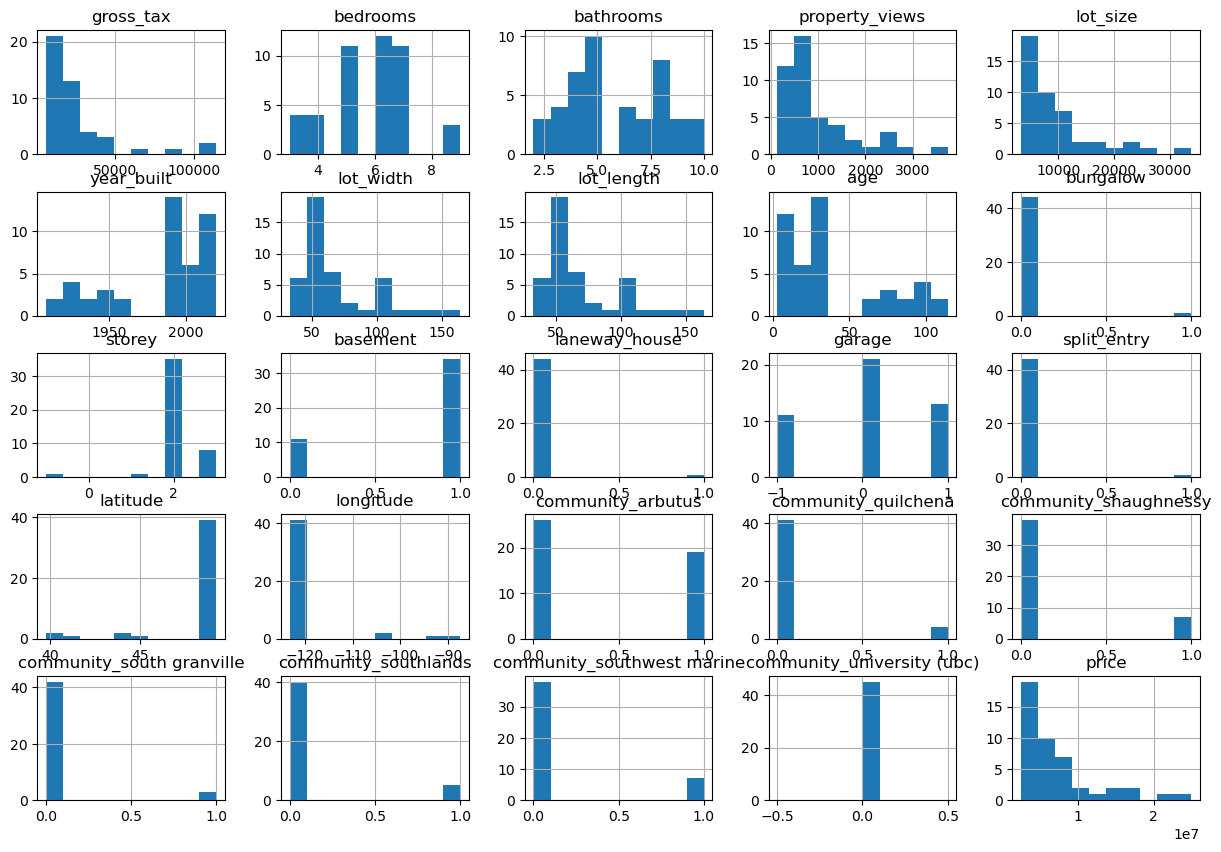

In [126]:
train_data.hist(figsize=(15,10))

In [127]:
# UN-skew data 

<AxesSubplot:>

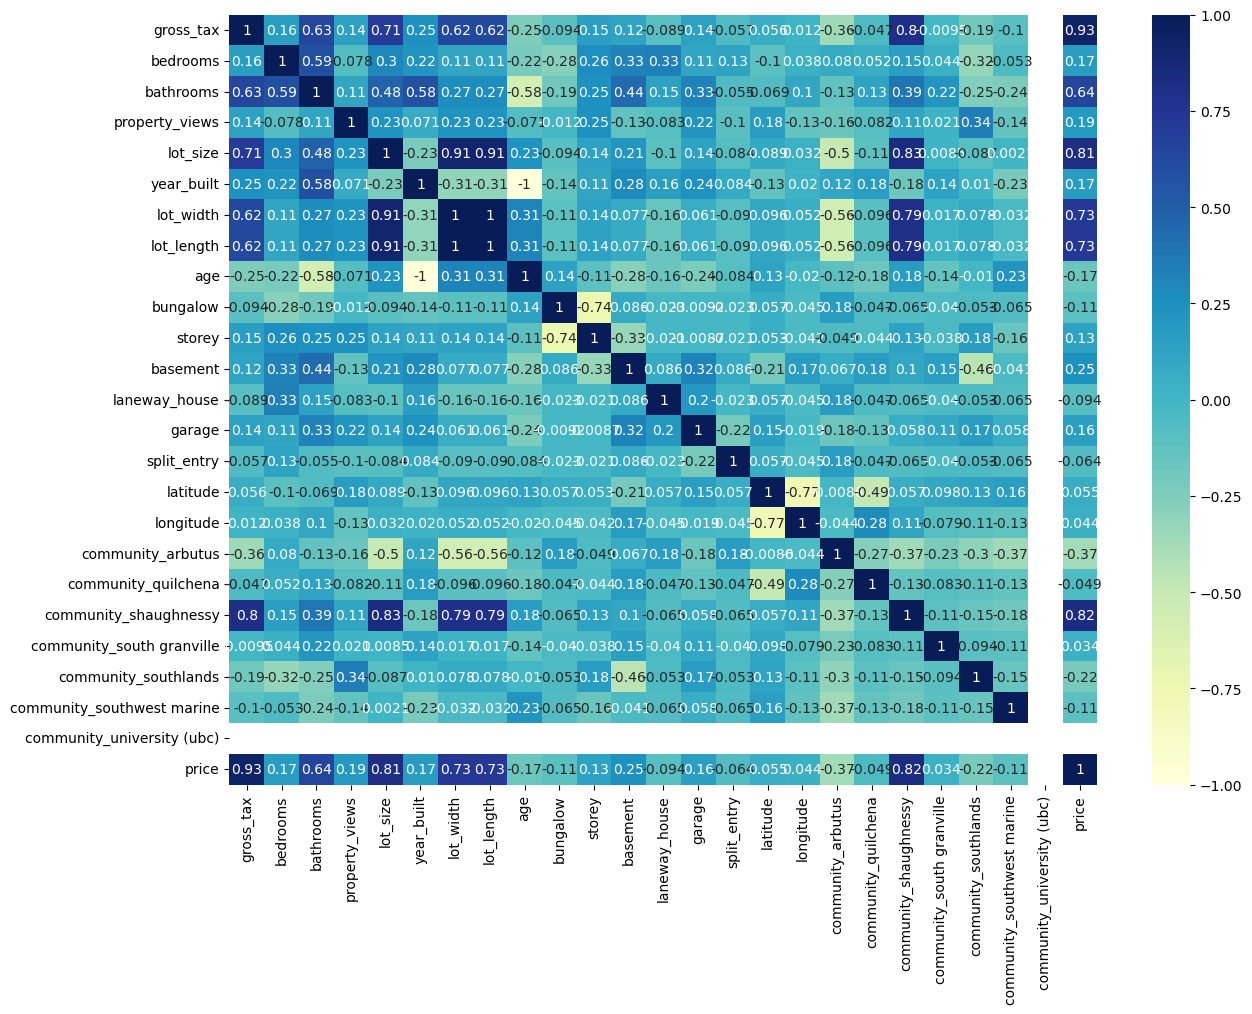

In [128]:
plt.figure(figsize=(14, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# split between cities ... 
# demographic
# how each attribute in each city differs
# garage

In [129]:
model_parameters = train_data.columns

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [131]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# convert categoricals with the test_data as well
test_data = X_test.join(y_test)
train_data = X_train.join(y_train)

X_test, y_test   = test_data.drop(['price'], axis=1), test_data['price']
X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_train_s.shape, X_test_s.shape


(45, 24) (45,) (5, 24) (5,)
(45, 24) (45,) (5, 24) (5,)


In [132]:
reg = LinearRegression()

reg.fit(X_train, y_train)
reg.score(X_test, y_test)


0.9378347462636301

In [133]:
reg.fit(X_train_s, y_train)
reg_score = reg.score(X_test_s, y_test)
reg_score



0.8643653515494292

In [134]:
from sklearn.linear_model import LinearRegression
from joblib import dump, load

if reg_score > 1:
    dump(reg, 'linear_reg_model.joblib')



In [135]:
from sklearn.ensemble import RandomForestClassifier



In [136]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)


0.2

In [137]:
forest_s = RandomForestClassifier()
forest_s.fit(X_train_s, y_train)
forest_s.score(X_test_s, y_test)


0.2

In [138]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()

param_grid = {
    "n_estimators": [3, 10, 30, 100, 200, 300],
    "max_features": [2, 4, 6, 8, 16],
    "max_depth": [None, 2, 4, 8, 16]
}

# grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# grid_search.fit(X_train_s, y_train)
# best_forest = grid_search.best_estimator_
# best_forest.score(X_test_s, y_test)